In [1]:
from google.colab import files
from IPython.display import Image

In [5]:
uploaded = files.upload()

Saving cosine_image.jpg to cosine_image (1).jpg
Saving jaccard_image.png to jaccard_image.png


# Calculate Jaccard Similarity
Using doc1 as Model Answer and doc2 as Student Answer as input and calculating jaccard similarity between two sentences.


In [ ]:
def jaccard_similarity(doc1, doc2):
  # List the unique words in a document
  words_doc1 = set(doc1.lower().split())
  words_doc2 = set(doc2.lower().split())

  # Find the intersection of words list of doc1 & doc2
  intersection = words_doc1.intersection(words_doc2)

  # Find the union of words list of doc1 & doc2
  union = words_doc1.union(words_doc2)

  # Calculate Jaccard similarity score
  # using length of intersection set divided by length of union set
  return float(len(intersection)/len(union))

In [ ]:
doc1 = "I am girl and loves choco"
doc2 = "I am girl and loves cake"
ans = jaccard_similarity(doc1, doc2)
print(ans)

0.7142857142857143


In [ ]:
doc1 = '''Software engineering is the branch of computer science that deals with the design, development, testing, and maintenance of software applications. Software engineers apply engineering principles and knowledge of programming languages to build software solutions for end users.'''
doc2 = '''Software engineering is the branch of computer science that deals with the design, development, testing, and maintenance of software applications. Software engineers apply engineering principles and knowledge of programming languages to build software solutions for end users.'''
ans = jaccard_similarity(doc1, doc2)
print(ans)

1.0


In [ ]:
doc1 = '''Software is a program or set of programs containing instructions that provide desired functionality. And Engineering is the process of designing and building something that serves a particular purpose and finds a cost-effective solution to problems.
Software engineering is the process of designing, developing, testing, and maintaining software. It is a systematic and disciplined approach to software development that aims to create high-quality, reliable, and maintainable software. Software engineering
includes a variety of techniques, tools, and methodologies, including requirements analysis, design, testing, and maintenance.'''

doc2 = '''Software engineering is the branch of computer science that deals with the design, development, testing, and maintenance of software applications. Software engineers apply engineering principles and knowledge of programming languages to build software solutions for end users.'''
ans = jaccard_similarity(doc1, doc2)
print(ans)

0.136986301369863


In [ ]:
doc1 = '''Dogs are the most loyal to us and have always shown loyalty.'''
doc2 = '''Dogs and humans have always shown a bond of loyalty.'''
ans = jaccard_similarity(doc1, doc2)
print(ans)

0.375


Jaccard Similarity:
Jaccard similarity
can be described as the total intersection upon the summation
of union of both sets.

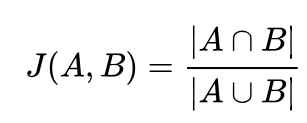

In [6]:
Image('jaccard_image.png')

# Calculate Cosine Similarity
<!-- Numerical Example: https://www.learndatasci.com/glossary/cosine-similarity/ -->

In [ ]:
doc_1 = "Myself student of Lokmanya Tilak College of Engineering"
doc_2 = "Myself Pooja Bhagat from Lokmanya Tilak College of Engineering"

data = [doc_1, doc_2]

In [ ]:
doc1 = '''Dogs are the most loyal to us and have always shown loyalty.'''
doc2 = '''Dogs and humans have always shown a bond of loyalty.'''
data = [doc1, doc2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(data)
vector_matrix

<2x15 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
tokens = count_vectorizer.get_feature_names_out()
tokens

array(['always', 'and', 'are', 'bond', 'dogs', 'have', 'humans', 'loyal',
       'loyalty', 'most', 'of', 'shown', 'the', 'to', 'us'], dtype=object)

In [ ]:
vector_matrix.toarray()

array([[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]])

In [ ]:
import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [ ]:
create_dataframe(vector_matrix.toarray(),tokens)

,always,and,are,bond,dogs,have,humans,loyal,loyalty,most,of,shown,the,to,us
doc_1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1
doc_2,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.00000,0.57735
doc_2,0.57735,1.00000


In [ ]:
doc1 = '''Dogs are the most loyal to us and have always shown loyalty.'''
doc2 = '''Dogs and humans have always shown a bond of loyalty.'''
ans = jaccard_similarity(doc1, doc2)
print(ans)

0.375


Cosine Similarity:

Cosine similarity is a metric used to measure the similarity of two vectors. Specifically, it measures the similarity in the direction or orientation of the vectors ignoring differences in their magnitude or scale. The similarity of two vectors is measured by the cosine of the angle between them.

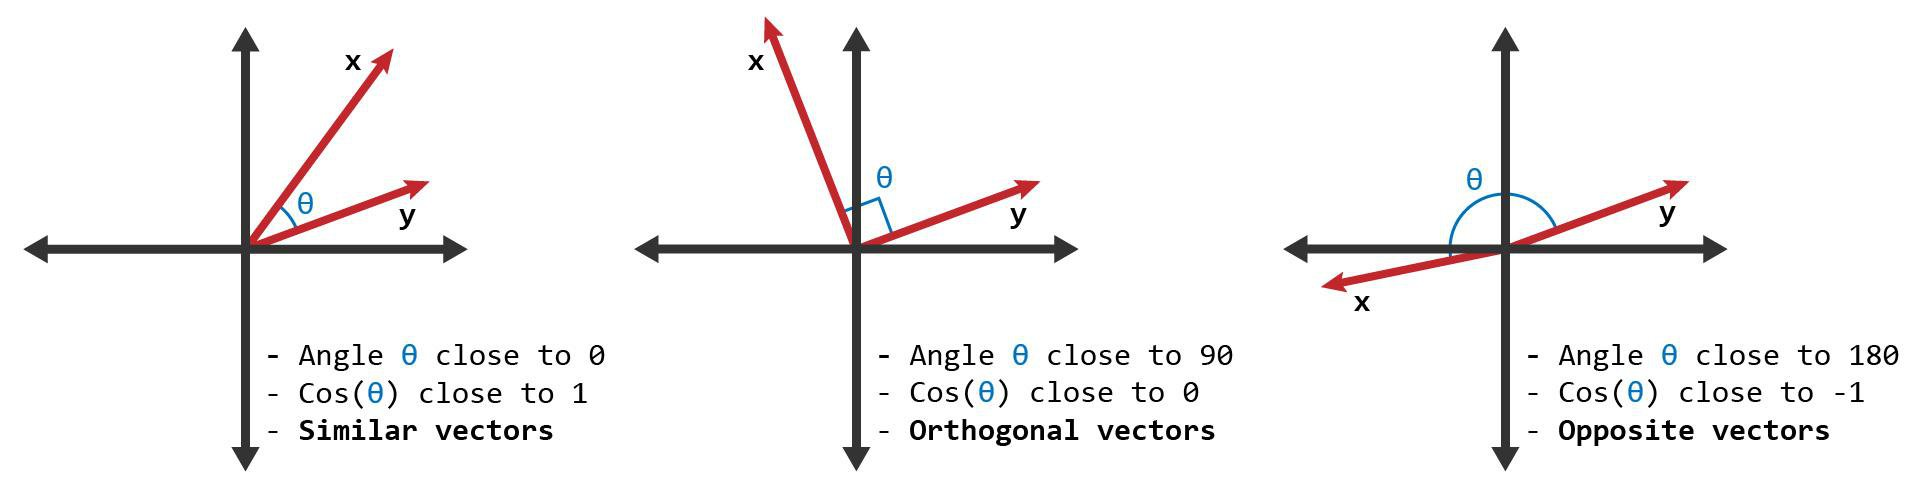

In [4]:
Image('cosine_image.jpg')


In the above examples, the words used are similar. Hence,
a cosine score of 0.5 is allotted to it. Based on the percentage,
similarity given by cosine similarity and Jaccard similarity was chosen to be the better measure of similarity

The major setback of cosine similarity for the purpose of
this system was that it takes into consideration even the
repetition of the same words. The measure of cosine similarity is higher primarily due to considering the repetitive similar words multiple times. This
can generate a greater similarity level completely based on
the number of times the word is repeated. Hence, Jaccard
similarity is the better measure of similarity for this system

# Semantic Similarity with BERT

**Description:** Natural Language Inference by fine-tuning BERT model on SNLI Corpus.

## Introduction

Semantic Similarity is the task of determining how similar
two sentences are, in terms of what they mean.
This example demonstrates the use of SNLI (Stanford Natural Language Inference) Corpus
to predict sentence semantic similarity with Transformers.
We will fine-tune a BERT model that takes two sentences as inputs
and that outputs a similarity score for these two sentences.

### References

* [BERT](https://arxiv.org/pdf/1810.04805.pdf)
* [SNLI](https://nlp.stanford.edu/projects/snli/)

## Setup

Note: install HuggingFace `transformers` via `pip install transformers` (version >= 2.11.0).

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import transformers

## Configuration

In [ ]:
max_length = 128  # Maximum length of input sentence to the model.
batch_size = 32
epochs = 2

# Labels in our dataset.
labels = ["contradiction", "entailment", "neutral"]

## Load the Data

In [ ]:
!curl -LO https://raw.githubusercontent.com/MohamadMerchant/SNLI/master/data.tar.gz
!tar -xvzf data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.1M  100 11.1M    0     0   149M      0 --:--:-- --:--:-- --:--:--  149M
SNLI_Corpus/
SNLI_Corpus/snli_1.0_dev.csv
SNLI_Corpus/snli_1.0_train.csv
SNLI_Corpus/snli_1.0_test.csv


In [ ]:
# There are more than 550k samples in total; we will use 100k for this example.
train_df = pd.read_csv("SNLI_Corpus/snli_1.0_train.csv", nrows=100000)
valid_df = pd.read_csv("SNLI_Corpus/snli_1.0_dev.csv")
test_df = pd.read_csv("SNLI_Corpus/snli_1.0_test.csv")

# Shape of the data
print(f"Total train samples : {train_df.shape[0]}")
print(f"Total validation samples: {valid_df.shape[0]}")
print(f"Total test samples: {valid_df.shape[0]}")

Total train samples : 100000
Total validation samples: 10000
Total test samples: 10000


Dataset Overview:

- sentence1: The premise caption that was supplied to the author of the pair.
- sentence2: The hypothesis caption that was written by the author of the pair.
- similarity: This is the label chosen by the majority of annotators.
Where no majority exists, the label "-" is used (we will skip such samples here).

Here are the "similarity" label values in our dataset:

- Contradiction: The sentences share no similarity.
- Entailment: The sentences have similar meaning.
- Neutral: The sentences are neutral.

Let's look at one sample from the dataset:

In [ ]:
print(f"Sentence1: {train_df.loc[1, 'sentence1']}")
print(f"Sentence2: {train_df.loc[1, 'sentence2']}")
print(f"Similarity: {train_df.loc[1, 'similarity']}")

Sentence1: A person on a horse jumps over a broken down airplane.
Sentence2: A person is at a diner, ordering an omelette.
Similarity: contradiction


## Preprocessing

In [ ]:
# We have some NaN entries in our train data, we will simply drop them.
print("Number of missing values")
print(train_df.isnull().sum())
train_df.dropna(axis=0, inplace=True)

Number of missing values
similarity    0
sentence1     0
sentence2     3
dtype: int64


Distribution of our training targets.

In [ ]:
print("Train Target Distribution")
print(train_df.similarity.value_counts())

Train Target Distribution
entailment       33384
contradiction    33310
neutral          33193
-                  110
Name: similarity, dtype: int64


Distribution of our validation targets.

In [ ]:
print("Validation Target Distribution")
print(valid_df.similarity.value_counts())

Validation Target Distribution
entailment       3329
contradiction    3278
neutral          3235
-                 158
Name: similarity, dtype: int64


The value "-" appears as part of our training and validation targets.
We will skip these samples.

In [ ]:
train_df = (
    train_df[train_df.similarity != "-"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)
valid_df = (
    valid_df[valid_df.similarity != "-"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

One-hot encode training, validation, and test labels.

In [ ]:
train_df["label"] = train_df["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1 if x == "entailment" else 2
)
y_train = tf.keras.utils.to_categorical(train_df.label, num_classes=3)

valid_df["label"] = valid_df["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1 if x == "entailment" else 2
)
y_val = tf.keras.utils.to_categorical(valid_df.label, num_classes=3)

test_df["label"] = test_df["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1 if x == "entailment" else 2
)
y_test = tf.keras.utils.to_categorical(test_df.label, num_classes=3)

## Keras Custom Data Generator

In [ ]:

class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    """Generates batches of data.

    Args:
        sentence_pairs: Array of premise and hypothesis input sentences.
        labels: Array of labels.
        batch_size: Integer batch size.
        shuffle: boolean, whether to shuffle the data.
        include_targets: boolean, whether to incude the labels.

    Returns:
        Tuples `([input_ids, attention_mask, `token_type_ids], labels)`
        (or just `[input_ids, attention_mask, `token_type_ids]`
         if `include_targets=False`)
    """

    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=batch_size,
        shuffle=True,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        # Load our BERT Tokenizer to encode the text.
        # We will use base-base-uncased pretrained model.
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased", do_lower_case=True
        )
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()

    def __len__(self):
        # Denotes the number of batches per epoch.
        return len(self.sentence_pairs) // self.batch_size

    def __getitem__(self, idx):
        # Retrieves the batch of index.
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        sentence_pairs = self.sentence_pairs[indexes]

        # With BERT tokenizer's batch_encode_plus batch of both the sentences are
        # encoded together and separated by [SEP] token.
        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            pad_to_max_length=True,
            return_tensors="tf",
        )

        # Convert batch of encoded features to numpy array.
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        # Set to true if data generator is used for training/validation.
        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if shuffle is set to True.
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)


## Build the model.

In [ ]:
# Create the model under a distribution strategy scope.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Encoded token ids from BERT tokenizer.
    input_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="input_ids"
    )
    # Attention masks indicates to the model which tokens should be attended to.
    attention_masks = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="attention_masks"
    )
    # Token type ids are binary masks identifying different sequences in the model.
    token_type_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="token_type_ids"
    )
    # Loading pretrained BERT model.
    bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")

    # Freeze the BERT model to reuse the pretrained features without modifying them.
    bert_model.trainable = False

    bert_output = bert_model.bert(
        input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
    )
    sequence_output = bert_output.last_hidden_state
    pooled_output = bert_output.pooler_output

    # Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
    bi_lstm = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    )(sequence_output)

    # Applying hybrid pooling approach to bi_lstm sequence output.
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
    concat = tf.keras.layers.concatenate([avg_pool, max_pool])
    dropout = tf.keras.layers.Dropout(0.3)(concat)
    output = tf.keras.layers.Dense(3, activation="softmax")(dropout)
    model = tf.keras.models.Model(
        inputs=[input_ids, attention_masks, token_type_ids], outputs=output
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["acc"],
    )


print(f"Strategy: {strategy}")
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Strategy: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7fdef2053100>
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',        

Create train and validation data generators

In [ ]:
train_data = BertSemanticDataGenerator(
    train_df[["sentence1", "sentence2"]].values.astype("str"),
    y_train,
    batch_size=batch_size,
    shuffle=True,
)
valid_data = BertSemanticDataGenerator(
    valid_df[["sentence1", "sentence2"]].values.astype("str"),
    y_val,
    batch_size=batch_size,
    shuffle=False,
)

## Train the Model

Training is done only for the top layers to perform "feature extraction",
which will allow the model to use the representations of the pretrained model.

In [ ]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    workers=-1,
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/2
   1/3121 [..............................] - ETA: 17:43:21 - loss: 1.2959 - acc: 0.2500

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  44/3121 [..............................] - ETA: 15:09 - loss: 1.1243 - acc: 0.3580

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  58/3121 [..............................] - ETA: 15:10 - loss: 1.1101 - acc: 0.3782

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 123/3121 [>.............................] - ETA: 14:53 - loss: 1.0673 - acc: 0.4284

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 134/3121 [>.............................] - ETA: 14:50 - loss: 1.0614 - acc: 0.4333

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 180/3121 [>.............................] - ETA: 14:44 - loss: 1.0415 - acc: 0.4543

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 205/3121 [>.............................] - ETA: 14:40 - loss: 1.0313 - acc: 0.4649

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 241/3121 [=>............................] - ETA: 14:33 - loss: 1.0133 - acc: 0.4843

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 254/3121 [=>............................] - ETA: 14:29 - loss: 1.0092 - acc: 0.4887

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 257/3121 [=>............................] - ETA: 14:28 - loss: 1.0081 - acc: 0.4895

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 288/3121 [=>............................] - ETA: 14:20 - loss: 0.9943 - acc: 0.5002

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 298/3121 [=>............................] - ETA: 14:17 - loss: 0.9878 - acc: 0.5057

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 342/3121 [==>...........................] - ETA: 14:04 - loss: 0.9722 - acc: 0.5186

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 375/3121 [==>...........................] - ETA: 13:55 - loss: 0.9577 - acc: 0.5298

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 399/3121 [==>...........................] - ETA: 13:48 - loss: 0.9491 - acc: 0.5360

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 417/3121 [===>..........................] - ETA: 13:42 - loss: 0.9425 - acc: 0.5410

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 429/3121 [===>..........................] - ETA: 13:39 - loss: 0.9388 - acc: 0.5439

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 435/3121 [===>..........................] - ETA: 13:38 - loss: 0.9367 - acc: 0.5454

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 460/3121 [===>..........................] - ETA: 13:31 - loss: 0.9301 - acc: 0.5503

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 486/3121 [===>..........................] - ETA: 13:23 - loss: 0.9222 - acc: 0.5570

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 547/3121 [====>.........................] - ETA: 13:05 - loss: 0.9053 - acc: 0.5693

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 613/3121 [====>.........................] - ETA: 12:44 - loss: 0.8858 - acc: 0.5819

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 637/3121 [=====>........................] - ETA: 12:38 - loss: 0.8801 - acc: 0.5856

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 668/3121 [=====>........................] - ETA: 12:28 - loss: 0.8729 - acc: 0.5907

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 678/3121 [=====>........................] - ETA: 12:25 - loss: 0.8710 - acc: 0.5921

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 684/3121 [=====>........................] - ETA: 12:23 - loss: 0.8695 - acc: 0.5932

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 787/3121 [======>.......................] - ETA: 11:52 - loss: 0.8500 - acc: 0.6061

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 788/3121 [======>.......................] - ETA: 11:52 - loss: 0.8497 - acc: 0.6063

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 891/3121 [=======>......................] - ETA: 11:21 - loss: 0.8324 - acc: 0.6170

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1035/3121 [========>.....................] - ETA: 10:37 - loss: 0.8109 - acc: 0.6303

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1067/3121 [=========>....................] - ETA: 10:27 - loss: 0.8084 - acc: 0.6321

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1088/3121 [=========>....................] - ETA: 10:21 - loss: 0.8064 - acc: 0.6337

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1124/3121 [=========>....................] - ETA: 10:10 - loss: 0.8016 - acc: 0.6371

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1179/3121 [==========>...................] - ETA: 9:53 - loss: 0.7956 - acc: 0.6409

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1186/3121 [==========>...................] - ETA: 9:51 - loss: 0.7949 - acc: 0.6413

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1242/3121 [==========>...................] - ETA: 9:34 - loss: 0.7900 - acc: 0.6450

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1276/3121 [===========>..................] - ETA: 9:24 - loss: 0.7872 - acc: 0.6468

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1284/3121 [===========>..................] - ETA: 9:21 - loss: 0.7863 - acc: 0.6473

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1308/3121 [===========>..................] - ETA: 9:14 - loss: 0.7840 - acc: 0.6485

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1322/3121 [===========>..................] - ETA: 9:10 - loss: 0.7823 - acc: 0.6495

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1379/3121 [============>.................] - ETA: 8:52 - loss: 0.7770 - acc: 0.6533

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1413/3121 [============>.................] - ETA: 8:42 - loss: 0.7736 - acc: 0.6553

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1457/3121 [=============>................] - ETA: 8:29 - loss: 0.7696 - acc: 0.6578

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1489/3121 [=============>................] - ETA: 8:19 - loss: 0.7672 - acc: 0.6595

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1561/3121 [==============>...............] - ETA: 7:57 - loss: 0.7627 - acc: 0.6618

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1597/3121 [==============>...............] - ETA: 7:46 - loss: 0.7597 - acc: 0.6634

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1618/3121 [==============>...............] - ETA: 7:39 - loss: 0.7576 - acc: 0.6645

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1626/3121 [==============>...............] - ETA: 7:37 - loss: 0.7568 - acc: 0.6649

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1674/3121 [===============>..............] - ETA: 7:22 - loss: 0.7541 - acc: 0.6663

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1702/3121 [===============>..............] - ETA: 7:14 - loss: 0.7516 - acc: 0.6677

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1804/3121 [================>.............] - ETA: 6:43 - loss: 0.7458 - acc: 0.6719

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1809/3121 [================>.............] - ETA: 6:41 - loss: 0.7455 - acc: 0.6722

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1823/3121 [================>.............] - ETA: 6:37 - loss: 0.7445 - acc: 0.6727

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1905/3121 [=================>............] - ETA: 6:12 - loss: 0.7382 - acc: 0.6763

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1911/3121 [=================>............] - ETA: 6:10 - loss: 0.7379 - acc: 0.6764

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1942/3121 [=================>............] - ETA: 6:00 - loss: 0.7355 - acc: 0.6777

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2047/3121 [==================>...........] - ETA: 5:28 - loss: 0.7311 - acc: 0.6803

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2170/3121 [===================>..........] - ETA: 4:51 - loss: 0.7260 - acc: 0.6838

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2176/3121 [===================>..........] - ETA: 4:49 - loss: 0.7255 - acc: 0.6841

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2261/3121 [====================>.........] - ETA: 4:23 - loss: 0.7222 - acc: 0.6860

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2262/3121 [====================>.........] - ETA: 4:22 - loss: 0.7222 - acc: 0.6860

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2263/3121 [====================>.........] - ETA: 4:22 - loss: 0.7222 - acc: 0.6860

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2344/3121 [=====================>........] - ETA: 3:57 - loss: 0.7194 - acc: 0.6875

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2347/3121 [=====================>........] - ETA: 3:56 - loss: 0.7192 - acc: 0.6876

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2406/3121 [======================>.......] - ETA: 3:38 - loss: 0.7170 - acc: 0.6889

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2411/3121 [======================>.......] - ETA: 3:37 - loss: 0.7166 - acc: 0.6891

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2439/3121 [======================>.......] - ETA: 3:28 - loss: 0.7156 - acc: 0.6897

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2484/3121 [======================>.......] - ETA: 3:14 - loss: 0.7138 - acc: 0.6908

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2516/3121 [=======================>......] - ETA: 3:05 - loss: 0.7126 - acc: 0.6917

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2542/3121 [=======================>......] - ETA: 2:57 - loss: 0.7117 - acc: 0.6922

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2716/3121 [=========================>....] - ETA: 2:03 - loss: 0.7064 - acc: 0.6954

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2749/3121 [=========================>....] - ETA: 1:53 - loss: 0.7051 - acc: 0.6961

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2839/3121 [==========================>...] - ETA: 1:26 - loss: 0.7026 - acc: 0.6976

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2915/3121 [===========================>..] - ETA: 1:03 - loss: 0.7009 - acc: 0.6985

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2955/3121 [===========================>..] - ETA: 50s - loss: 0.6997 - acc: 0.6993

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3042/3121 [============================>.] - ETA: 24s - loss: 0.6969 - acc: 0.7009

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3062/3121 [============================>.] - ETA: 18s - loss: 0.6963 - acc: 0.7013

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3078/3121 [============================>.] - ETA: 13s - loss: 0.6957 - acc: 0.7015

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - ETA: 0s - loss: 0.6944 - acc: 0.7020

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will alwa

3121/3121 [==============================] - 1121s 353ms/step - loss: 0.6944 - acc: 0.7020 - val_loss: 0.5179 - val_acc: 0.8000
Epoch 2/2
   3/3121 [..............................] - ETA: 15:22 - loss: 0.6081 - acc: 0.7396

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  10/3121 [..............................] - ETA: 15:28 - loss: 0.5845 - acc: 0.7531

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  54/3121 [..............................] - ETA: 15:32 - loss: 0.6176 - acc: 0.7454

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 174/3121 [>.............................] - ETA: 15:09 - loss: 0.6054 - acc: 0.7529

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 196/3121 [>.............................] - ETA: 15:02 - loss: 0.6005 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 201/3121 [>.............................] - ETA: 15:00 - loss: 0.5999 - acc: 0.7554

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 210/3121 [=>............................] - ETA: 14:58 - loss: 0.5990 - acc: 0.7558

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 311/3121 [=>............................] - ETA: 14:23 - loss: 0.6062 - acc: 0.7510

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 321/3121 [==>...........................] - ETA: 14:20 - loss: 0.6078 - acc: 0.7504

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 347/3121 [==>...........................] - ETA: 14:12 - loss: 0.6049 - acc: 0.7524

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 348/3121 [==>...........................] - ETA: 14:12 - loss: 0.6047 - acc: 0.7525

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 349/3121 [==>...........................] - ETA: 14:11 - loss: 0.6047 - acc: 0.7525

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 354/3121 [==>...........................] - ETA: 14:09 - loss: 0.6061 - acc: 0.7519

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 396/3121 [==>...........................] - ETA: 13:56 - loss: 0.6085 - acc: 0.7510

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 489/3121 [===>..........................] - ETA: 13:28 - loss: 0.6078 - acc: 0.7513

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 551/3121 [====>.........................] - ETA: 13:10 - loss: 0.6041 - acc: 0.7520

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 561/3121 [====>.........................] - ETA: 13:06 - loss: 0.6034 - acc: 0.7529

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 565/3121 [====>.........................] - ETA: 13:05 - loss: 0.6029 - acc: 0.7530

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 732/3121 [======>.......................] - ETA: 12:14 - loss: 0.6033 - acc: 0.7526

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 756/3121 [======>.......................] - ETA: 12:06 - loss: 0.6030 - acc: 0.7533

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 768/3121 [======>.......................] - ETA: 12:02 - loss: 0.6019 - acc: 0.7540

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 786/3121 [======>.......................] - ETA: 11:57 - loss: 0.6024 - acc: 0.7536

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 806/3121 [======>.......................] - ETA: 11:50 - loss: 0.6011 - acc: 0.7543

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 829/3121 [======>.......................] - ETA: 11:43 - loss: 0.5999 - acc: 0.7548

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 861/3121 [=======>......................] - ETA: 11:33 - loss: 0.5991 - acc: 0.7556

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 865/3121 [=======>......................] - ETA: 11:32 - loss: 0.5987 - acc: 0.7557

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 870/3121 [=======>......................] - ETA: 11:31 - loss: 0.5987 - acc: 0.7556

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 949/3121 [========>.....................] - ETA: 11:06 - loss: 0.5980 - acc: 0.7556

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 960/3121 [========>.....................] - ETA: 11:03 - loss: 0.5987 - acc: 0.7552

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 966/3121 [========>.....................] - ETA: 11:01 - loss: 0.5986 - acc: 0.7551

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 997/3121 [========>.....................] - ETA: 10:52 - loss: 0.5982 - acc: 0.7552

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1017/3121 [========>.....................] - ETA: 10:45 - loss: 0.5987 - acc: 0.7547

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1120/3121 [=========>....................] - ETA: 10:13 - loss: 0.5993 - acc: 0.7545

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1142/3121 [=========>....................] - ETA: 10:06 - loss: 0.5993 - acc: 0.7542

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1160/3121 [==========>...................] - ETA: 10:01 - loss: 0.5997 - acc: 0.7542

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1220/3121 [==========>...................] - ETA: 9:43 - loss: 0.6001 - acc: 0.7544

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1224/3121 [==========>...................] - ETA: 9:42 - loss: 0.6003 - acc: 0.7543

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1242/3121 [==========>...................] - ETA: 9:36 - loss: 0.6001 - acc: 0.7545

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1252/3121 [===========>..................] - ETA: 9:33 - loss: 0.6001 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1315/3121 [===========>..................] - ETA: 9:13 - loss: 0.5999 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1326/3121 [===========>..................] - ETA: 9:10 - loss: 0.6000 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1330/3121 [===========>..................] - ETA: 9:09 - loss: 0.6001 - acc: 0.7545

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1355/3121 [============>.................] - ETA: 9:01 - loss: 0.5999 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1376/3121 [============>.................] - ETA: 8:55 - loss: 0.6001 - acc: 0.7547

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1387/3121 [============>.................] - ETA: 8:51 - loss: 0.6004 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1396/3121 [============>.................] - ETA: 8:49 - loss: 0.6006 - acc: 0.7545

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1412/3121 [============>.................] - ETA: 8:44 - loss: 0.6012 - acc: 0.7542

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1415/3121 [============>.................] - ETA: 8:43 - loss: 0.6010 - acc: 0.7544

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1429/3121 [============>.................] - ETA: 8:38 - loss: 0.6008 - acc: 0.7547

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1436/3121 [============>.................] - ETA: 8:36 - loss: 0.6007 - acc: 0.7548

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1443/3121 [============>.................] - ETA: 8:34 - loss: 0.6008 - acc: 0.7547

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1472/3121 [=============>................] - ETA: 8:25 - loss: 0.6010 - acc: 0.7546

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1486/3121 [=============>................] - ETA: 8:21 - loss: 0.6010 - acc: 0.7545

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1577/3121 [==============>...............] - ETA: 7:53 - loss: 0.6009 - acc: 0.7548

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1599/3121 [==============>...............] - ETA: 7:46 - loss: 0.6006 - acc: 0.7548

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1630/3121 [==============>...............] - ETA: 7:37 - loss: 0.6005 - acc: 0.7547

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1699/3121 [===============>..............] - ETA: 7:15 - loss: 0.5997 - acc: 0.7549

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1769/3121 [================>.............] - ETA: 6:54 - loss: 0.5988 - acc: 0.7549

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1865/3121 [================>.............] - ETA: 6:25 - loss: 0.5973 - acc: 0.7559

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1876/3121 [=================>............] - ETA: 6:21 - loss: 0.5970 - acc: 0.7559

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2084/3121 [===================>..........] - ETA: 5:17 - loss: 0.5968 - acc: 0.7563

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2128/3121 [===================>..........] - ETA: 5:04 - loss: 0.5964 - acc: 0.7563

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2177/3121 [===================>..........] - ETA: 4:49 - loss: 0.5958 - acc: 0.7567

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2201/3121 [====================>.........] - ETA: 4:41 - loss: 0.5965 - acc: 0.7563

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2282/3121 [====================>.........] - ETA: 4:17 - loss: 0.5960 - acc: 0.7565

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2325/3121 [=====================>........] - ETA: 4:03 - loss: 0.5955 - acc: 0.7567

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2378/3121 [=====================>........] - ETA: 3:47 - loss: 0.5955 - acc: 0.7568

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2420/3121 [======================>.......] - ETA: 3:34 - loss: 0.5954 - acc: 0.7570

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2441/3121 [======================>.......] - ETA: 3:28 - loss: 0.5954 - acc: 0.7572

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2485/3121 [======================>.......] - ETA: 3:14 - loss: 0.5952 - acc: 0.7573

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2536/3121 [=======================>......] - ETA: 2:59 - loss: 0.5951 - acc: 0.7571

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2635/3121 [========================>.....] - ETA: 2:28 - loss: 0.5946 - acc: 0.7571

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2679/3121 [========================>.....] - ETA: 2:15 - loss: 0.5943 - acc: 0.7573

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2706/3121 [=========================>....] - ETA: 2:07 - loss: 0.5943 - acc: 0.7572

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2735/3121 [=========================>....] - ETA: 1:58 - loss: 0.5943 - acc: 0.7573

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3011/3121 [===========================>..] - ETA: 33s - loss: 0.5919 - acc: 0.7581

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3027/3121 [============================>.] - ETA: 28s - loss: 0.5921 - acc: 0.7581

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - ETA: 0s - loss: 0.5927 - acc: 0.7582

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - 1042s 334ms/step - loss: 0.5927 - acc: 0.7582 - val_loss: 0.4972 - val_acc: 0.8095


## Fine-tuning

This step must only be performed after the feature extraction model has
been trained to convergence on the new data.

This is an optional last step where `bert_model` is unfreezed and retrained
with a very low learning rate. This can deliver meaningful improvement by
incrementally adapting the pretrained features to the new data.

In [ ]:
# Unfreeze the bert_model.
bert_model.trainable = True
# Recompile the model to make the change effective.
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]',    

# Train the entire model end-to-end.

In [ ]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    workers=-1,
)

Epoch 1/2


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  26/3121 [..............................] - ETA: 41:34 - loss: 0.5046 - accuracy: 0.8101

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 127/3121 [>.............................] - ETA: 40:15 - loss: 0.5369 - accuracy: 0.7776

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 135/3121 [>.............................] - ETA: 40:08 - loss: 0.5378 - accuracy: 0.7792

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 210/3121 [=>............................] - ETA: 39:03 - loss: 0.5295 - accuracy: 0.7860

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 213/3121 [=>............................] - ETA: 39:01 - loss: 0.5289 - accuracy: 0.7862

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 251/3121 [=>............................] - ETA: 38:28 - loss: 0.5310 - accuracy: 0.7840

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 273/3121 [=>............................] - ETA: 38:10 - loss: 0.5267 - accuracy: 0.7874

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 328/3121 [==>...........................] - ETA: 37:24 - loss: 0.5227 - accuracy: 0.7896

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 403/3121 [==>...........................] - ETA: 36:21 - loss: 0.5181 - accuracy: 0.7913

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 499/3121 [===>..........................] - ETA: 35:03 - loss: 0.5152 - accuracy: 0.7928

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 501/3121 [===>..........................] - ETA: 35:02 - loss: 0.5152 - accuracy: 0.7927

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 558/3121 [====>.........................] - ETA: 34:16 - loss: 0.5168 - accuracy: 0.7930

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 660/3121 [=====>........................] - ETA: 32:53 - loss: 0.5158 - accuracy: 0.7949

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 751/3121 [======>.......................] - ETA: 31:39 - loss: 0.5129 - accuracy: 0.7962

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 839/3121 [=======>......................] - ETA: 30:29 - loss: 0.5068 - accuracy: 0.7989

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 840/3121 [=======>......................] - ETA: 30:28 - loss: 0.5065 - accuracy: 0.7991

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1091/3121 [=========>....................] - ETA: 27:06 - loss: 0.5012 - accuracy: 0.8024

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1139/3121 [=========>....................] - ETA: 26:28 - loss: 0.4999 - accuracy: 0.8029

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1154/3121 [==========>...................] - ETA: 26:16 - loss: 0.4998 - accuracy: 0.8030

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1156/3121 [==========>...................] - ETA: 26:14 - loss: 0.4997 - accuracy: 0.8031

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1181/3121 [==========>...................] - ETA: 25:54 - loss: 0.4993 - accuracy: 0.8032

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1183/3121 [==========>...................] - ETA: 25:52 - loss: 0.4991 - accuracy: 0.8033

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1223/3121 [==========>...................] - ETA: 25:20 - loss: 0.4984 - accuracy: 0.8036

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1229/3121 [==========>...................] - ETA: 25:15 - loss: 0.4982 - accuracy: 0.8037

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1237/3121 [==========>...................] - ETA: 25:09 - loss: 0.4979 - accuracy: 0.8038

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1270/3121 [===========>..................] - ETA: 24:43 - loss: 0.4969 - accuracy: 0.8043

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1323/3121 [===========>..................] - ETA: 24:00 - loss: 0.4961 - accuracy: 0.8052

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1332/3121 [===========>..................] - ETA: 23:53 - loss: 0.4960 - accuracy: 0.8053

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1340/3121 [===========>..................] - ETA: 23:46 - loss: 0.4957 - accuracy: 0.8054

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1445/3121 [============>.................] - ETA: 22:22 - loss: 0.4934 - accuracy: 0.8069

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1467/3121 [=============>................] - ETA: 22:04 - loss: 0.4930 - accuracy: 0.8071

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1553/3121 [=============>................] - ETA: 20:55 - loss: 0.4911 - accuracy: 0.8078

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1556/3121 [=============>................] - ETA: 20:53 - loss: 0.4912 - accuracy: 0.8076

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1567/3121 [==============>...............] - ETA: 20:44 - loss: 0.4914 - accuracy: 0.8075

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1631/3121 [==============>...............] - ETA: 19:53 - loss: 0.4906 - accuracy: 0.8081

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1653/3121 [==============>...............] - ETA: 19:35 - loss: 0.4903 - accuracy: 0.8081

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1679/3121 [===============>..............] - ETA: 19:14 - loss: 0.4897 - accuracy: 0.8084

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1743/3121 [===============>..............] - ETA: 18:23 - loss: 0.4897 - accuracy: 0.8084

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1751/3121 [===============>..............] - ETA: 18:17 - loss: 0.4897 - accuracy: 0.8086

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1779/3121 [================>.............] - ETA: 17:54 - loss: 0.4882 - accuracy: 0.8092

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1849/3121 [================>.............] - ETA: 16:58 - loss: 0.4874 - accuracy: 0.8095

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1880/3121 [=================>............] - ETA: 16:33 - loss: 0.4868 - accuracy: 0.8099

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1898/3121 [=================>............] - ETA: 16:19 - loss: 0.4857 - accuracy: 0.8103

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1921/3121 [=================>............] - ETA: 16:00 - loss: 0.4856 - accuracy: 0.8105

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1948/3121 [=================>............] - ETA: 15:39 - loss: 0.4849 - accuracy: 0.8107

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2011/3121 [==================>...........] - ETA: 14:48 - loss: 0.4840 - accuracy: 0.8110

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2026/3121 [==================>...........] - ETA: 14:36 - loss: 0.4836 - accuracy: 0.8112

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2044/3121 [==================>...........] - ETA: 14:22 - loss: 0.4837 - accuracy: 0.8112

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2097/3121 [===================>..........] - ETA: 13:39 - loss: 0.4827 - accuracy: 0.8118

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2109/3121 [===================>..........] - ETA: 13:30 - loss: 0.4824 - accuracy: 0.8120

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2143/3121 [===================>..........] - ETA: 13:03 - loss: 0.4819 - accuracy: 0.8122

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2144/3121 [===================>..........] - ETA: 13:02 - loss: 0.4819 - accuracy: 0.8122

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2158/3121 [===================>..........] - ETA: 12:51 - loss: 0.4819 - accuracy: 0.8122

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2199/3121 [====================>.........] - ETA: 12:18 - loss: 0.4812 - accuracy: 0.8126

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2226/3121 [====================>.........] - ETA: 11:56 - loss: 0.4808 - accuracy: 0.8127

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2246/3121 [====================>.........] - ETA: 11:40 - loss: 0.4807 - accuracy: 0.8128

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2264/3121 [====================>.........] - ETA: 11:26 - loss: 0.4805 - accuracy: 0.8130

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2302/3121 [=====================>........] - ETA: 10:55 - loss: 0.4804 - accuracy: 0.8130

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2350/3121 [=====================>........] - ETA: 10:17 - loss: 0.4797 - accuracy: 0.8134

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2360/3121 [=====================>........] - ETA: 10:09 - loss: 0.4794 - accuracy: 0.8135

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2361/3121 [=====================>........] - ETA: 10:08 - loss: 0.4794 - accuracy: 0.8135

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2446/3121 [======================>.......] - ETA: 9:00 - loss: 0.4781 - accuracy: 0.8143

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2459/3121 [======================>.......] - ETA: 8:49 - loss: 0.4783 - accuracy: 0.8142

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2500/3121 [=======================>......] - ETA: 8:17 - loss: 0.4782 - accuracy: 0.8143

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2553/3121 [=======================>......] - ETA: 7:34 - loss: 0.4777 - accuracy: 0.8146

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2626/3121 [========================>.....] - ETA: 6:36 - loss: 0.4773 - accuracy: 0.8147

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2641/3121 [========================>.....] - ETA: 6:24 - loss: 0.4768 - accuracy: 0.8149

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2729/3121 [=========================>....] - ETA: 5:13 - loss: 0.4753 - accuracy: 0.8155

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2732/3121 [=========================>....] - ETA: 5:11 - loss: 0.4753 - accuracy: 0.8155

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2806/3121 [=========================>....] - ETA: 4:12 - loss: 0.4743 - accuracy: 0.8158

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2845/3121 [==========================>...] - ETA: 3:40 - loss: 0.4741 - accuracy: 0.8157

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2848/3121 [==========================>...] - ETA: 3:38 - loss: 0.4741 - accuracy: 0.8157

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2862/3121 [==========================>...] - ETA: 3:27 - loss: 0.4739 - accuracy: 0.8158

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2930/3121 [===========================>..] - ETA: 2:32 - loss: 0.4721 - accuracy: 0.8167

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2959/3121 [===========================>..] - ETA: 2:09 - loss: 0.4721 - accuracy: 0.8166

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2964/3121 [===========================>..] - ETA: 2:05 - loss: 0.4720 - accuracy: 0.8166

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2975/3121 [===========================>..] - ETA: 1:56 - loss: 0.4721 - accuracy: 0.8166

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3080/3121 [============================>.] - ETA: 32s - loss: 0.4704 - accuracy: 0.8173

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.8175

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - 2639s 829ms/step - loss: 0.4696 - accuracy: 0.8175 - val_loss: 0.3657 - val_accuracy: 0.8600
Epoch 2/2


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  13/3121 [..............................] - ETA: 41:30 - loss: 0.3438 - accuracy: 0.8798

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  20/3121 [..............................] - ETA: 41:25 - loss: 0.3353 - accuracy: 0.8813

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  23/3121 [..............................] - ETA: 41:23 - loss: 0.3394 - accuracy: 0.8750

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  66/3121 [..............................] - ETA: 40:49 - loss: 0.3603 - accuracy: 0.8741

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  97/3121 [..............................] - ETA: 40:23 - loss: 0.3585 - accuracy: 0.8747

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 123/3121 [>.............................] - ETA: 40:01 - loss: 0.3552 - accuracy: 0.8765

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 127/3121 [>.............................] - ETA: 39:57 - loss: 0.3555 - accuracy: 0.8752

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 148/3121 [>.............................] - ETA: 39:39 - loss: 0.3557 - accuracy: 0.8712

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 169/3121 [>.............................] - ETA: 39:24 - loss: 0.3536 - accuracy: 0.8730

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 183/3121 [>.............................] - ETA: 39:12 - loss: 0.3525 - accuracy: 0.8726

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 207/3121 [>.............................] - ETA: 38:53 - loss: 0.3501 - accuracy: 0.8729

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 307/3121 [=>............................] - ETA: 37:33 - loss: 0.3554 - accuracy: 0.8688

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 337/3121 [==>...........................] - ETA: 37:09 - loss: 0.3577 - accuracy: 0.8684

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 353/3121 [==>...........................] - ETA: 36:56 - loss: 0.3565 - accuracy: 0.8694

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 489/3121 [===>..........................] - ETA: 35:07 - loss: 0.3571 - accuracy: 0.8686

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 511/3121 [===>..........................] - ETA: 34:50 - loss: 0.3561 - accuracy: 0.8691

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 537/3121 [====>.........................] - ETA: 34:29 - loss: 0.3571 - accuracy: 0.8682

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 544/3121 [====>.........................] - ETA: 34:24 - loss: 0.3564 - accuracy: 0.8685

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 656/3121 [=====>........................] - ETA: 32:56 - loss: 0.3553 - accuracy: 0.8695

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 678/3121 [=====>........................] - ETA: 32:38 - loss: 0.3554 - accuracy: 0.8693

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 802/3121 [======>.......................] - ETA: 30:58 - loss: 0.3553 - accuracy: 0.8694

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 811/3121 [======>.......................] - ETA: 30:51 - loss: 0.3549 - accuracy: 0.8694

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 855/3121 [=======>......................] - ETA: 30:16 - loss: 0.3541 - accuracy: 0.8697

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 899/3121 [=======>......................] - ETA: 29:40 - loss: 0.3558 - accuracy: 0.8689

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 923/3121 [=======>......................] - ETA: 29:21 - loss: 0.3553 - accuracy: 0.8688

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 947/3121 [========>.....................] - ETA: 29:01 - loss: 0.3554 - accuracy: 0.8690

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1013/3121 [========>.....................] - ETA: 28:08 - loss: 0.3561 - accuracy: 0.8684

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1030/3121 [========>.....................] - ETA: 27:55 - loss: 0.3554 - accuracy: 0.8687

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1100/3121 [=========>....................] - ETA: 26:59 - loss: 0.3555 - accuracy: 0.8691

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1168/3121 [==========>...................] - ETA: 26:04 - loss: 0.3562 - accuracy: 0.8687

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1225/3121 [==========>...................] - ETA: 25:18 - loss: 0.3576 - accuracy: 0.8683

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1235/3121 [==========>...................] - ETA: 25:10 - loss: 0.3574 - accuracy: 0.8685

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1309/3121 [===========>..................] - ETA: 24:11 - loss: 0.3570 - accuracy: 0.8687

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1348/3121 [===========>..................] - ETA: 23:40 - loss: 0.3574 - accuracy: 0.8684

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1365/3121 [============>.................] - ETA: 23:26 - loss: 0.3576 - accuracy: 0.8683

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1413/3121 [============>.................] - ETA: 22:48 - loss: 0.3580 - accuracy: 0.8681

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1449/3121 [============>.................] - ETA: 22:19 - loss: 0.3569 - accuracy: 0.8685

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1523/3121 [=============>................] - ETA: 21:20 - loss: 0.3561 - accuracy: 0.8692

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1691/3121 [===============>..............] - ETA: 19:05 - loss: 0.3552 - accuracy: 0.8695

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1762/3121 [===============>..............] - ETA: 18:08 - loss: 0.3550 - accuracy: 0.8697

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1778/3121 [================>.............] - ETA: 17:55 - loss: 0.3549 - accuracy: 0.8697

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1804/3121 [================>.............] - ETA: 17:35 - loss: 0.3551 - accuracy: 0.8697

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1828/3121 [================>.............] - ETA: 17:15 - loss: 0.3547 - accuracy: 0.8698

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1917/3121 [=================>............] - ETA: 16:04 - loss: 0.3537 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1960/3121 [=================>............] - ETA: 15:30 - loss: 0.3539 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


1997/3121 [==================>...........] - ETA: 15:00 - loss: 0.3532 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2009/3121 [==================>...........] - ETA: 14:50 - loss: 0.3531 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2012/3121 [==================>...........] - ETA: 14:48 - loss: 0.3532 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2015/3121 [==================>...........] - ETA: 14:46 - loss: 0.3530 - accuracy: 0.8702

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2061/3121 [==================>...........] - ETA: 14:09 - loss: 0.3536 - accuracy: 0.8699

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2139/3121 [===================>..........] - ETA: 13:06 - loss: 0.3528 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2166/3121 [===================>..........] - ETA: 12:45 - loss: 0.3530 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2170/3121 [===================>..........] - ETA: 12:41 - loss: 0.3529 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2176/3121 [===================>..........] - ETA: 12:37 - loss: 0.3527 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2261/3121 [====================>.........] - ETA: 11:29 - loss: 0.3537 - accuracy: 0.8699

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2320/3121 [=====================>........] - ETA: 10:41 - loss: 0.3535 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2325/3121 [=====================>........] - ETA: 10:37 - loss: 0.3535 - accuracy: 0.8699

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2445/3121 [======================>.......] - ETA: 9:01 - loss: 0.3540 - accuracy: 0.8698

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2461/3121 [======================>.......] - ETA: 8:48 - loss: 0.3538 - accuracy: 0.8699

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2470/3121 [======================>.......] - ETA: 8:41 - loss: 0.3538 - accuracy: 0.8699

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2482/3121 [======================>.......] - ETA: 8:32 - loss: 0.3535 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2507/3121 [=======================>......] - ETA: 8:11 - loss: 0.3532 - accuracy: 0.8702

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2547/3121 [=======================>......] - ETA: 7:39 - loss: 0.3534 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2572/3121 [=======================>......] - ETA: 7:19 - loss: 0.3535 - accuracy: 0.8698

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2668/3121 [========================>.....] - ETA: 6:02 - loss: 0.3536 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2730/3121 [=========================>....] - ETA: 5:13 - loss: 0.3534 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2734/3121 [=========================>....] - ETA: 5:10 - loss: 0.3534 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2765/3121 [=========================>....] - ETA: 4:45 - loss: 0.3539 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2785/3121 [=========================>....] - ETA: 4:29 - loss: 0.3538 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2839/3121 [==========================>...] - ETA: 3:46 - loss: 0.3536 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2896/3121 [==========================>...] - ETA: 3:00 - loss: 0.3534 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2918/3121 [===========================>..] - ETA: 2:42 - loss: 0.3536 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2919/3121 [===========================>..] - ETA: 2:41 - loss: 0.3536 - accuracy: 0.8700

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


2949/3121 [===========================>..] - ETA: 2:17 - loss: 0.3537 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3010/3121 [===========================>..] - ETA: 1:28 - loss: 0.3536 - accuracy: 0.8701

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3077/3121 [============================>.] - ETA: 35s - loss: 0.3539 - accuracy: 0.8702

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3093/3121 [============================>.] - ETA: 22s - loss: 0.3536 - accuracy: 0.8703

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3111/3121 [============================>.] - ETA: 8s - loss: 0.3536 - accuracy: 0.8703

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8703

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


3121/3121 [==============================] - 2588s 829ms/step - loss: 0.3537 - accuracy: 0.8703 - val_loss: 0.3491 - val_accuracy: 0.8731


## Evaluate model on the test set

In [ ]:
test_data = BertSemanticDataGenerator(
    test_df[["sentence1", "sentence2"]].values.astype("str"),
    y_test,
    batch_size=batch_size,
    shuffle=False,
)
model.evaluate(test_data, verbose=1)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


 70/312 [=====>........................] - ETA: 1:08 - loss: 0.3862 - accuracy: 0.8554

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


 83/312 [======>.......................] - ETA: 1:04 - loss: 0.3822 - accuracy: 0.8581

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


312/312 [==============================] - 89s 284ms/step - loss: 0.3655 - accuracy: 0.8683


[0.3655186593532562, 0.8682892918586731]

## Inference on custom sentences

In [ ]:

def check_similarity(sentence1, sentence2):
    sentence_pairs = np.array([[str(sentence1), str(sentence2)]])
    test_data = BertSemanticDataGenerator(
        sentence_pairs, labels=None, batch_size=1, shuffle=False, include_targets=False,
    )

    proba = model.predict(test_data[0])[0]
    idx = np.argmax(proba)
    proba = f"{proba[idx]: .2f}%"
    pred = labels[idx]
    return pred, proba


Save the Model:

In [ ]:
# saving model in .h5 file for deployment
model.save('saved_model_pooja.h5')

Check results on some example sentence pairs.

In [ ]:
sentence1 = "Two women are observing something together."
sentence2 = "Two women are standing with their eyes closed."
check_similarity(sentence1, sentence2)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 6s 6s/step


('contradiction', ' 0.80%')

Check results on some example sentence pairs.

In [ ]:
sentence1 = "A smiling costumed woman is holding an umbrella"
sentence2 = "A happy woman in a fairy costume holds an umbrella"
check_similarity(sentence1, sentence2)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


1/1 [==============================] - 0s 121ms/step


('neutral', ' 0.95%')

Check results on some example sentence pairs

In [ ]:
sentence1 = "A soccer game with multiple males playing"
sentence2 = "Some men are playing a sport"
check_similarity(sentence1, sentence2)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


1/1 [==============================] - 0s 121ms/step


('entailment', ' 0.93%')

<!-- Example available on HuggingFace

| Trained Model | Demo |
| :--: | :--: |
| [![Generic badge](https://img.shields.io/badge/%F0%9F%A4%97%20Model-semantic%20similarity%20with%20bert-black.svg)](https://huggingface.co/keras-io/bert-semantic-similarity) | [![Generic badge](https://img.shields.io/badge/\%F0%9F%A4%97%20Spaces-semantic%20similarity%20with%20bert-black.svg)](https://huggingface.co/spaces/keras-io/bert-semantic-similarity) | -->